In [57]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np


In [58]:
scaler = MinMaxScaler()
sscaler = StandardScaler()

cancer = load_breast_cancer()

In [59]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [60]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [61]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)

In [62]:
# MinMax Scalar
scaler.fit(cancer.data)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_all_scaled = scaler.transform(cancer.data)

In [82]:
# Standard scalar
sscaler.fit(cancer.data)
X_train_scaled = sscaler.transform(X_train)
X_test_scaled = sscaler.transform(X_test)
X_all_scaled = sscaler.transform(cancer.data)

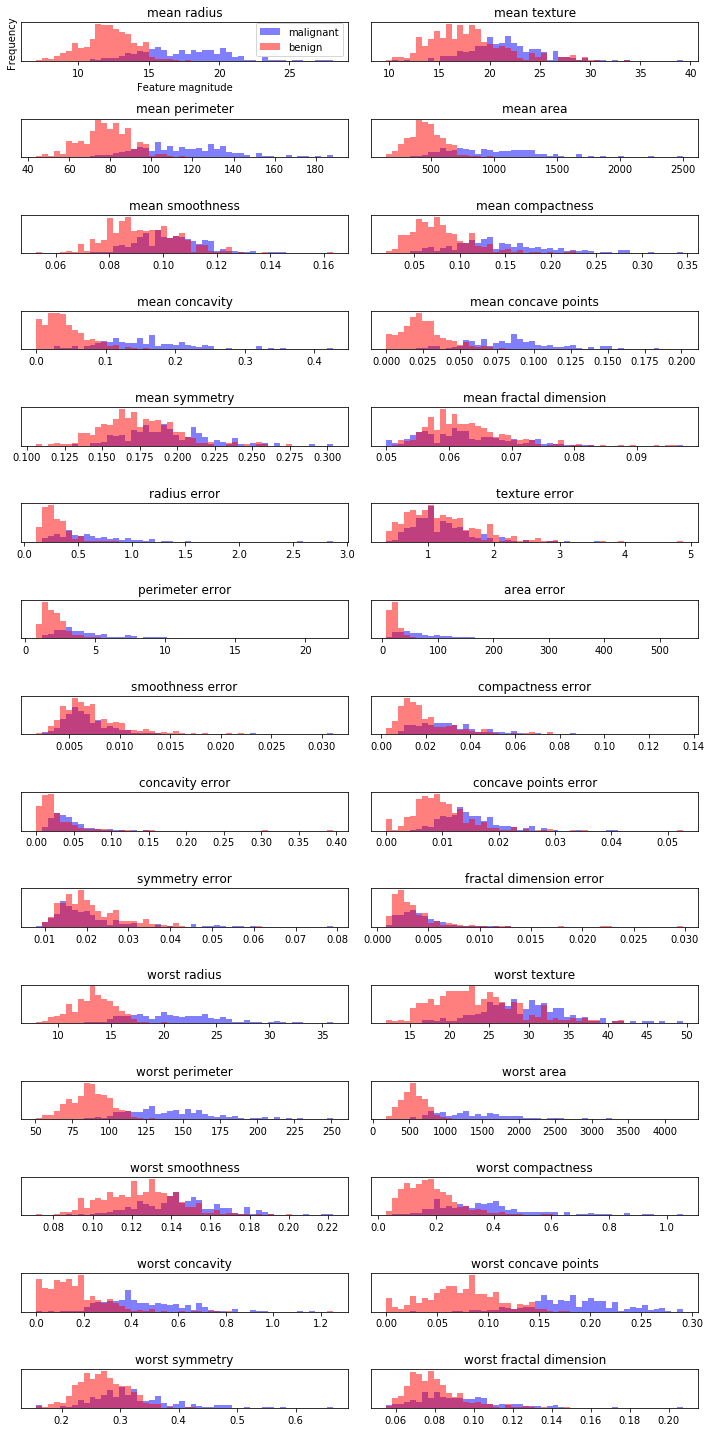

In [21]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color='b', alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color='r', alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

In [94]:
pca = PCA(n_components=11)
pca.fit(X_all_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Train Original shape: {}".format(str(X_train_scaled.shape)))
print("Train Reduced shape: {}".format(str(X_train_pca.shape)))

print("Test Original shape: {}".format(str(X_test_scaled.shape)))
print("Test Reduced shape: {}".format(str(X_test_pca.shape)))


Train Original shape: (426, 30)
Train Reduced shape: (426, 11)
Test Original shape: (143, 30)
Test Reduced shape: (143, 11)


Text(0, 0.5, 'Principal components')

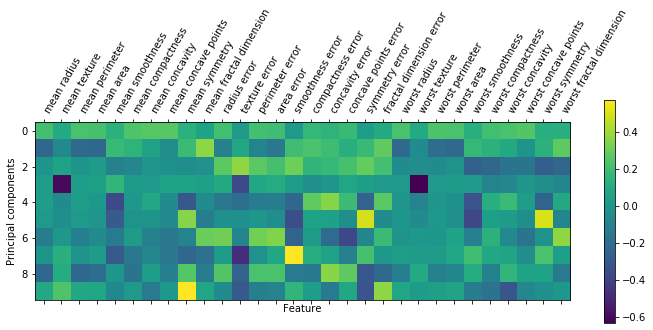

In [84]:
plt.matshow(pca.components_, cmap='viridis')
#plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

In [65]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.951


In [95]:
tree.fit(X_train_pca, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train_pca, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test_pca, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.944
